In [ ]:
%pip install yfinance  requests


In [ ]:
import yfinance as yf
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
%matplotlib inline

# Bitcoin data

In [ ]:
def get_bitcoin_price():
    url = "https://api.coingecko.com/api/v3/simple/price?ids=bitcoin&vs_currencies=usd"
    response = requests.get(url)
    data = response.json()
    return data["bitcoin"]["usd"]

print("Bitcoin Price:","$",get_bitcoin_price())

Bitcoin Price: $ 84525


In [ ]:
# Bitcoin Ticker
btc = yf.Ticker("BTC-USD")

# List of periods want to fetch
periods = ['3mo', '1y', '5y']

# Dictionary to store DataFrames for each period
btc_data = {}

for period in periods:
    # Fetch historical data for the period
    hist = btc.history(period=period)
    btc_data[period] = hist
    print(f"\n===== Bitcoin Data for period: {period} =====")
    print(hist.head())  # Show the first few rows of each period's data




===== Bitcoin Data for period: 3mo =====
                                    Open           High            Low  \
Date                                                                     
2025-01-14 00:00:00+00:00   94519.007812   97352.664062   94322.156250   
2025-01-15 00:00:00+00:00   96534.046875  100697.234375   96501.640625   
2025-01-16 00:00:00+00:00  100505.296875  100781.585938   97364.445312   
2025-01-17 00:00:00+00:00  100025.765625  105884.226562   99948.906250   
2025-01-18 00:00:00+00:00  104124.953125  104913.203125  102226.617188   

                                   Close       Volume  Dividends  Stock Splits  
Date                                                                            
2025-01-14 00:00:00+00:00   96534.046875  53769675818        0.0           0.0  
2025-01-15 00:00:00+00:00  100504.492188  57805923627        0.0           0.0  
2025-01-16 00:00:00+00:00   99756.906250  54103781805        0.0           0.0  
2025-01-17 00:00:00+00:00  104462.

In [ ]:
for period in periods:
    btc_data[period].to_csv(f'BTC_USD_{period}.csv')


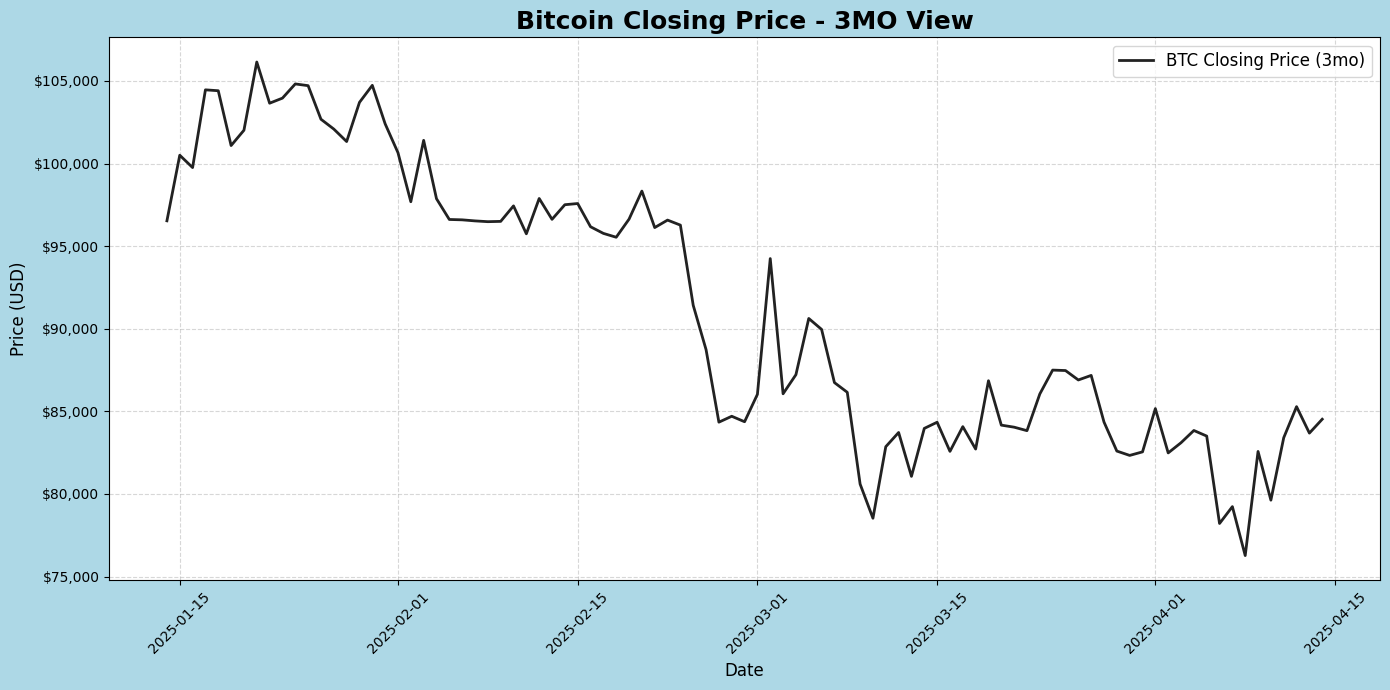

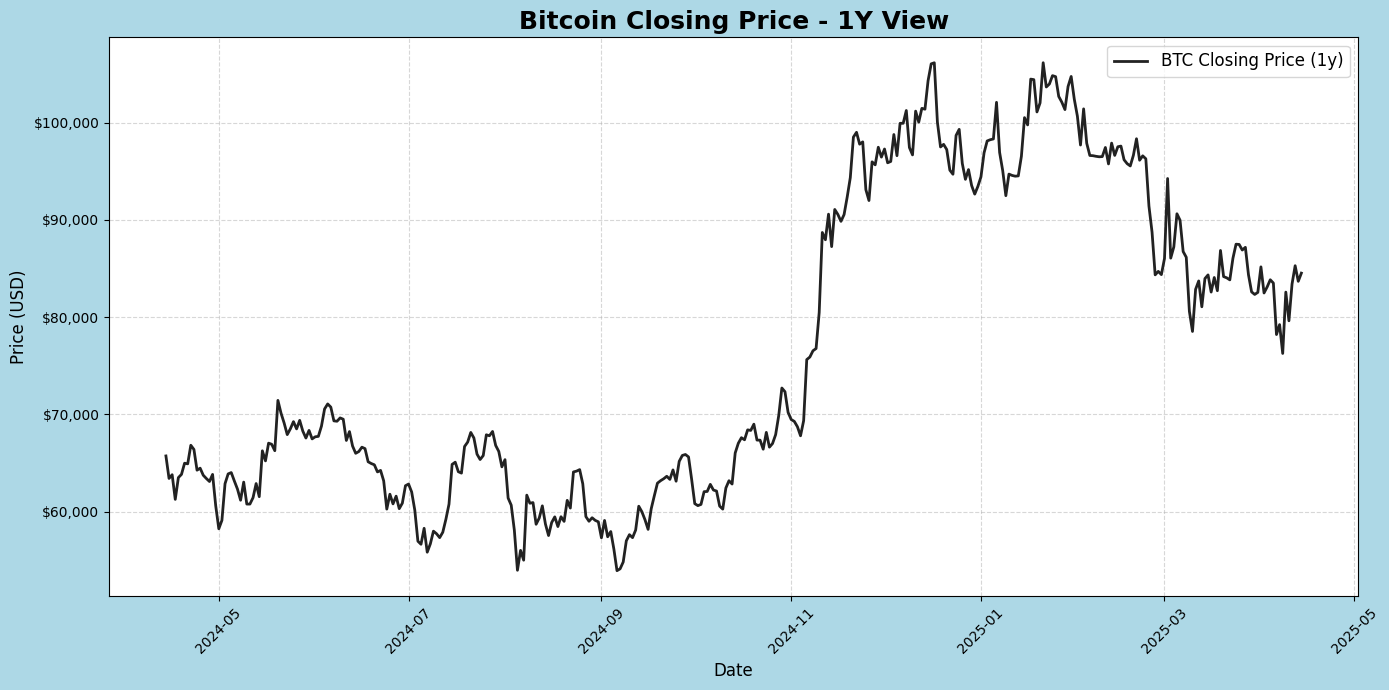

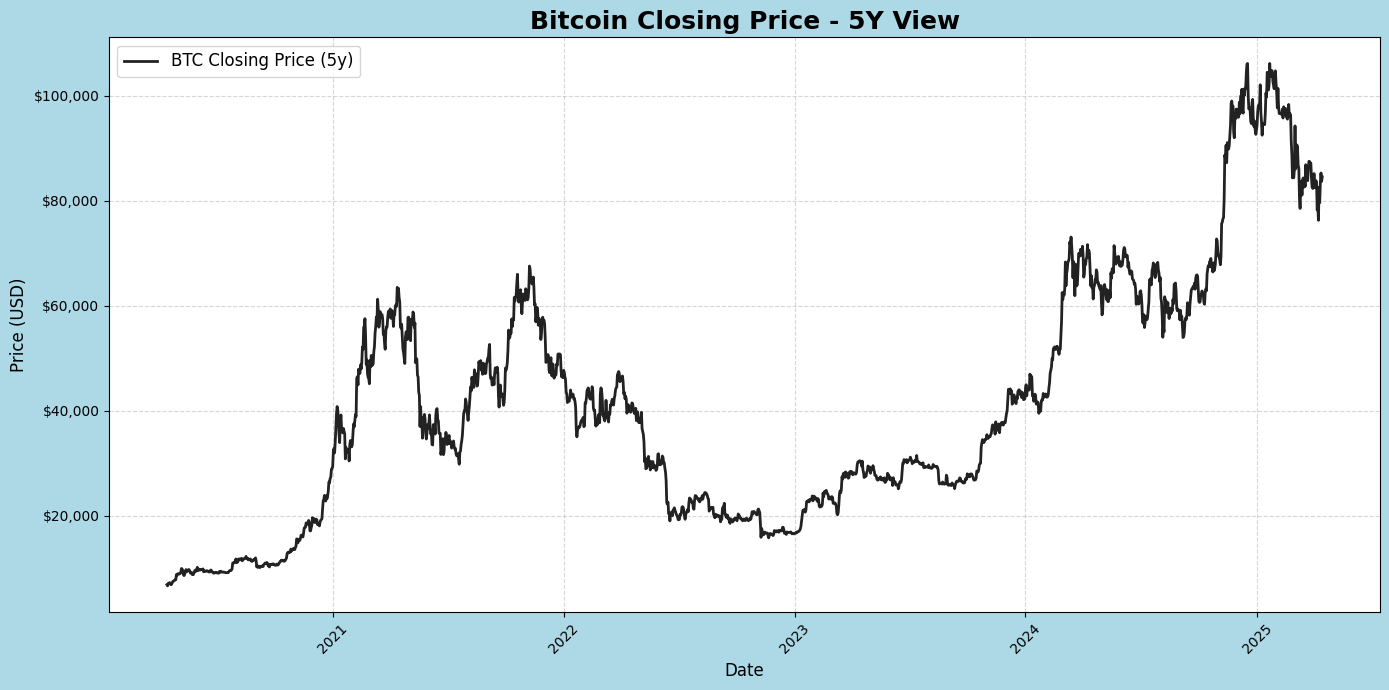

In [ ]:
plot_periods = ["3mo", "1y", "5y"]

for period in plot_periods:
    df = pd.read_csv(f'BTC_USD_{period}.csv', index_col=0, parse_dates=True)

    fig, ax = plt.subplots(figsize=(14, 7))
    fig.set_facecolor('lightblue')

    ax.plot(df.index, df['Close'], label=f'BTC Closing Price ({period})', color='#222222', linewidth=2)

    # Aesthetics
    ax.set_facecolor('white')
    ax.set_title(f'Bitcoin Closing Price - {period.upper()} View', fontsize=18, fontweight='bold')
    ax.set_xlabel('Date', fontsize=12)
    ax.set_ylabel('Price (USD)', fontsize=12)
    ax.tick_params(axis='both', labelsize=10)
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.legend(fontsize=12)

    # Format y-axis with thousands separator and dollar sign
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))

    # Rotate x-ticks if necessary
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


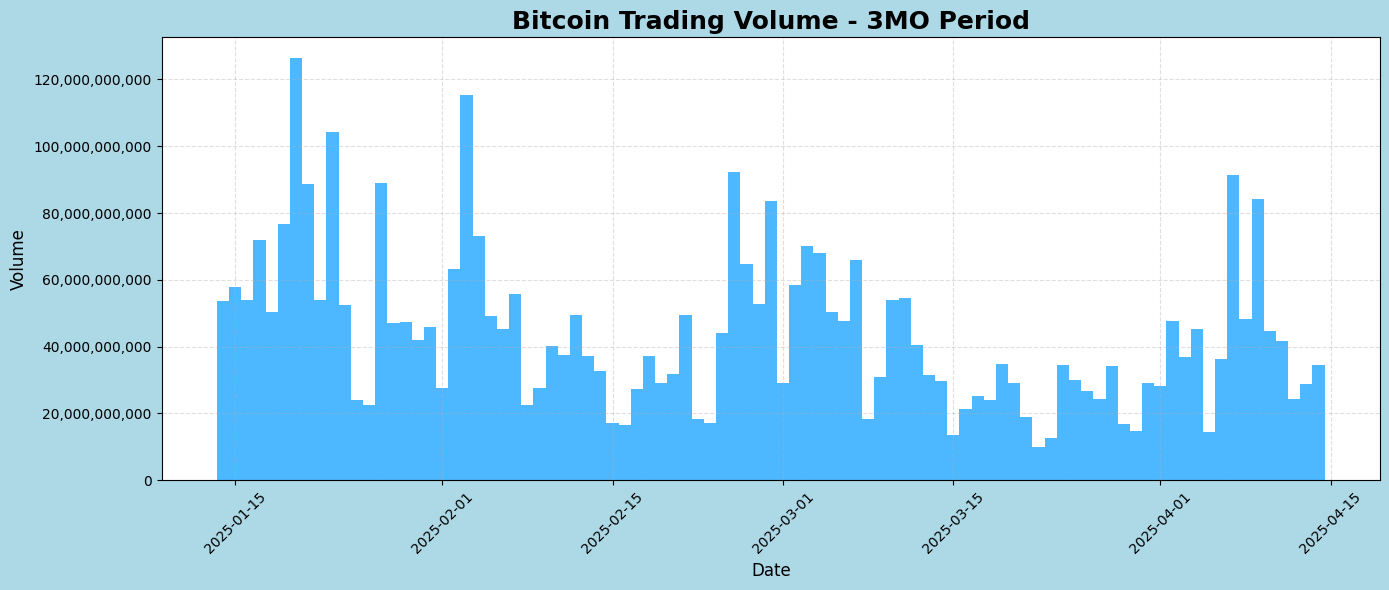

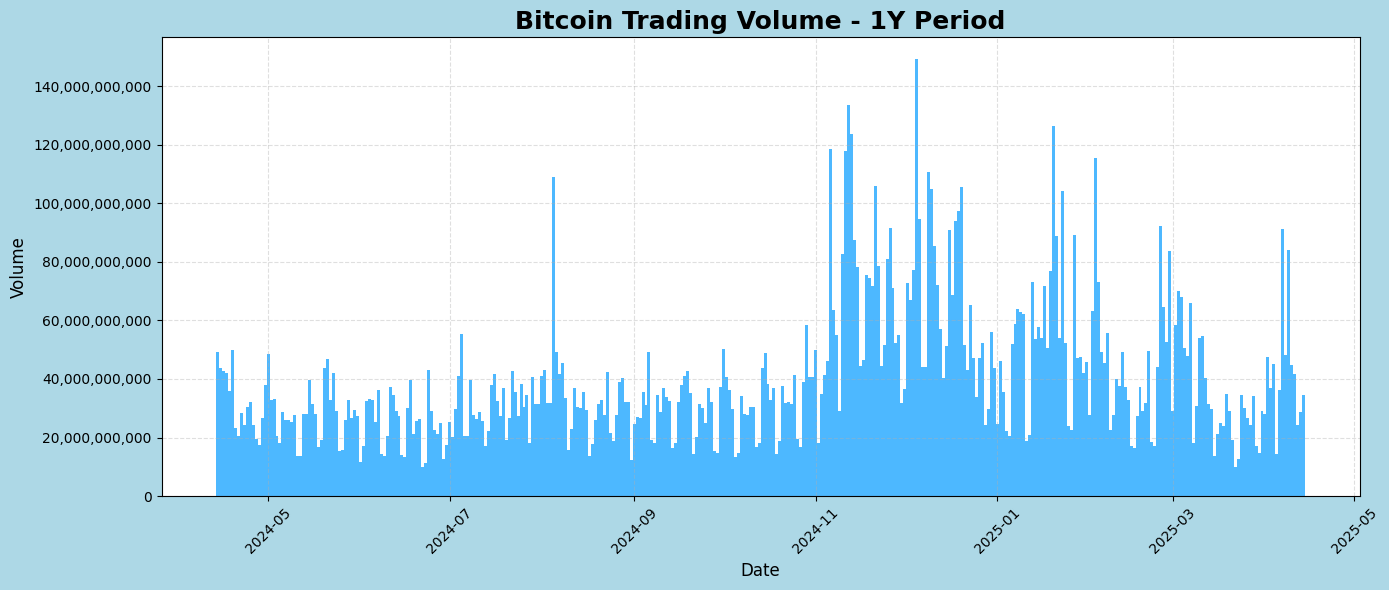

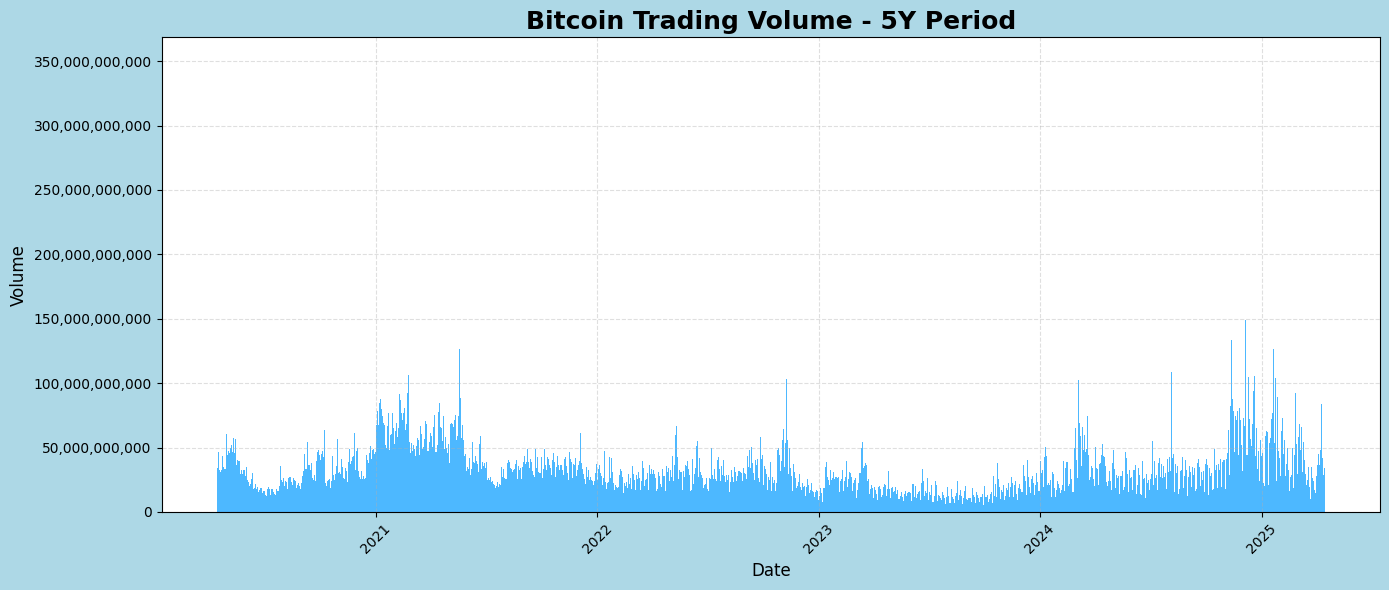

In [ ]:
periods = ["3mo", "1y", "5y"]

for period in periods:
    # Load the CSV file for each period
    df = pd.read_csv(f'BTC_USD_{period}.csv', index_col=0, parse_dates=True)

    fig, ax = plt.subplots(figsize=(14, 6))
    fig.set_facecolor('lightblue')
    ax.set_facecolor('white')

    # Bar plot for volume
    ax.bar(df.index, df['Volume'], color='#4db8ff', width=1)

    # Labels and title
    ax.set_title(f'Bitcoin Trading Volume - {period.upper()} Period', fontsize=18, fontweight='bold')
    ax.set_xlabel('Date', fontsize=12)
    ax.set_ylabel('Volume', fontsize=12)

    # Format y-axis with commas (e.g., 1,000,000)
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

    # Grid and ticks
    ax.grid(True, linestyle='--', alpha=0.4)
    ax.tick_params(axis='both', labelsize=10)
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()


# Moving Average

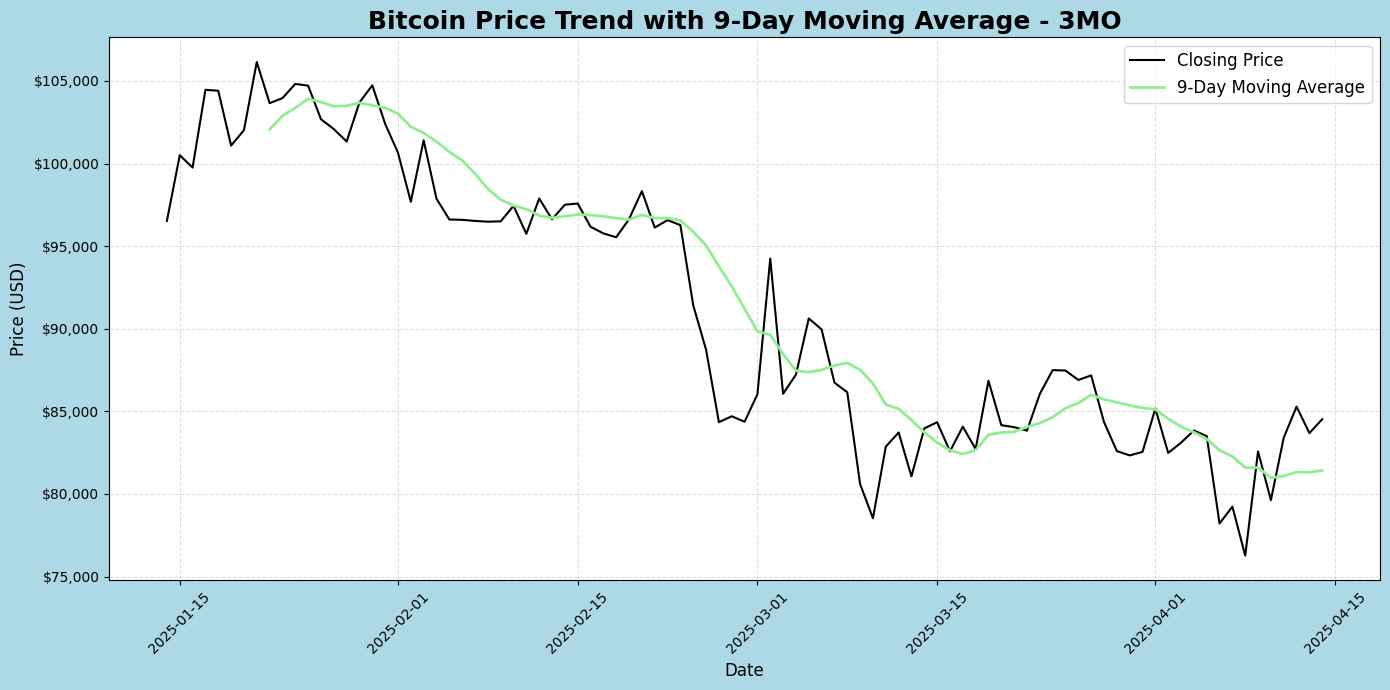

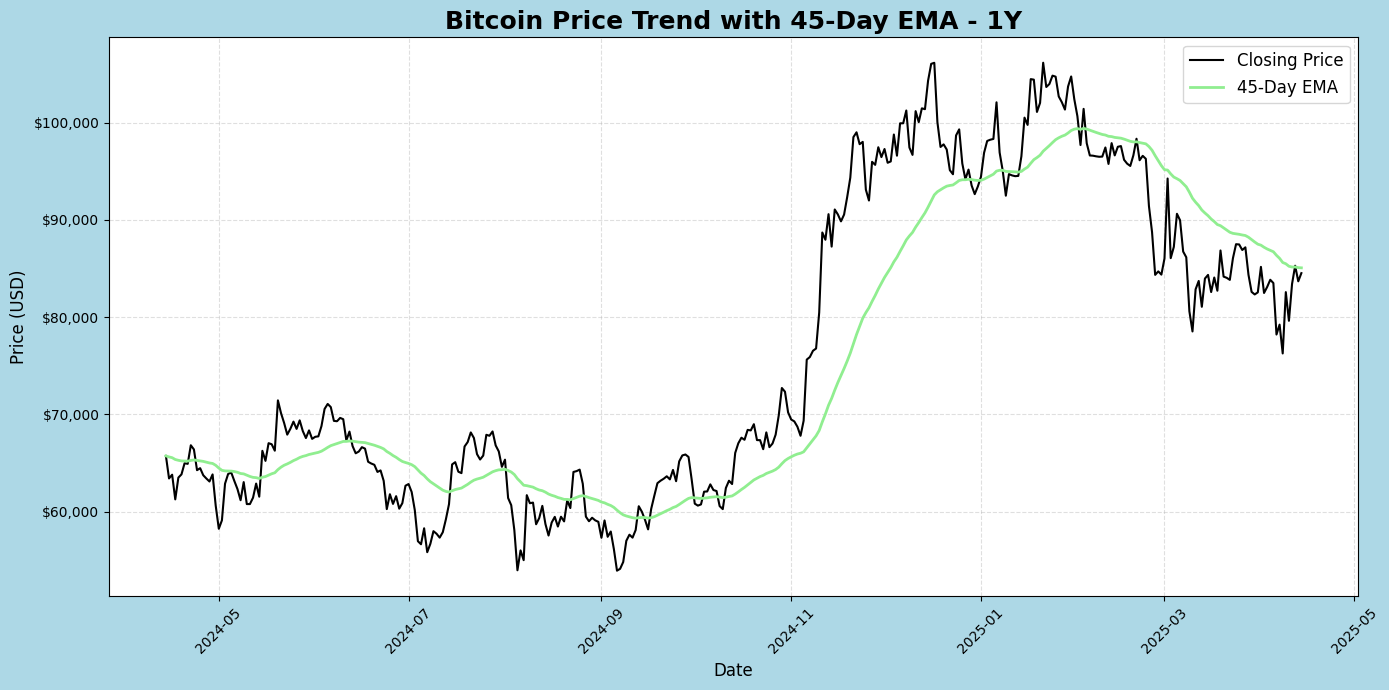

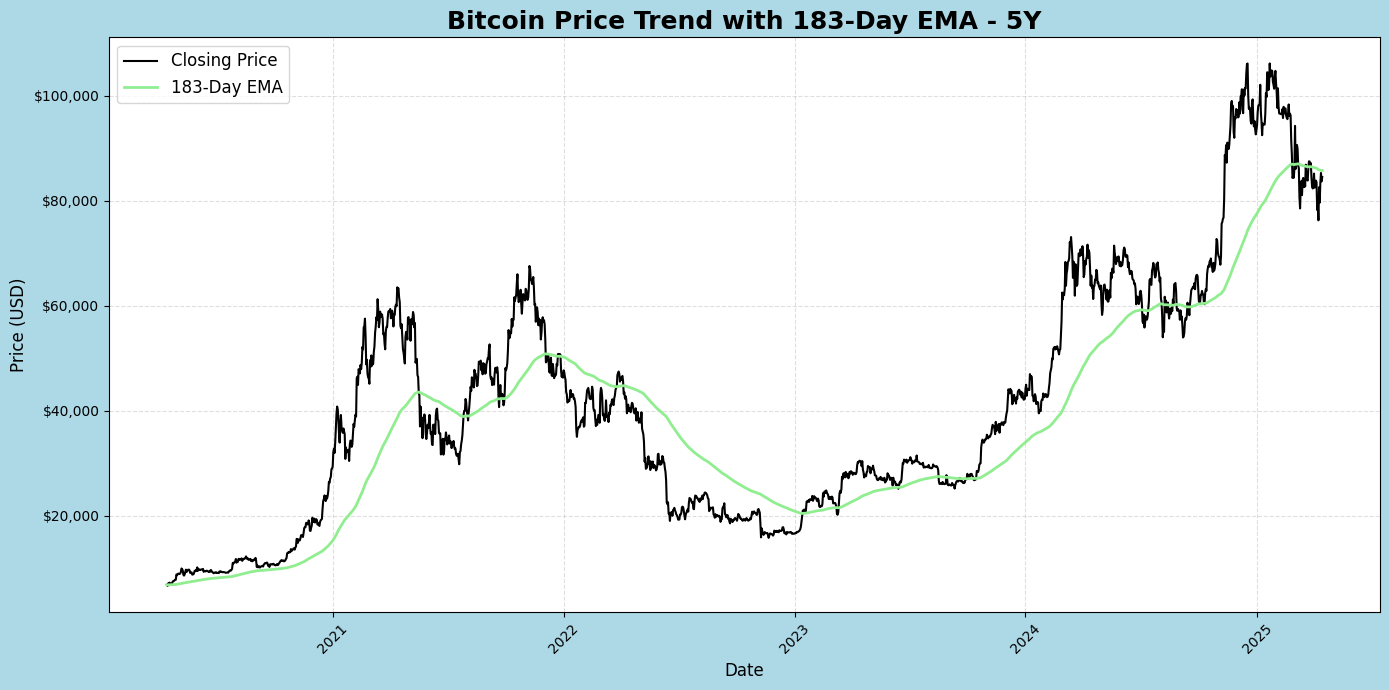

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plot_periods = ["3mo", "1y", "5y"]

for period in plot_periods:
    df = pd.read_csv(f'BTC_USD_{period}.csv', index_col=0, parse_dates=True)

    fig, ax = plt.subplots(figsize=(14, 7))
    fig.set_facecolor('lightblue')
    ax.set_facecolor('white')

    # Apply moving average based on period
    if period == "3mo":
        df['MA'] = df['Close'].rolling(window=9).mean()
        ma_label = '9-Day Moving Average'
    elif period == "1y":
        df['MA'] = df['Close'].ewm(span=45, adjust=False).mean()
        ma_label = '45-Day EMA'
    elif period == "5y":
        df['MA'] = df['Close'].ewm(span=183, adjust=False).mean()
        ma_label = '183-Day EMA'

    # Plot closing price
    ax.plot(df.index, df['Close'], label='Closing Price', color='black', linewidth=1.5)

    # Plot moving average
    ax.plot(df.index, df['MA'], label=ma_label, color='lightgreen', linewidth=2)

    # Styling
    ax.set_title(f'Bitcoin Price Trend with {ma_label} - {period.upper()}', fontsize=18, fontweight='bold')
    ax.set_xlabel('Date', fontsize=12)
    ax.set_ylabel('Price (USD)', fontsize=12)
    ax.tick_params(axis='both', labelsize=10)
    ax.grid(True, linestyle='--', alpha=0.4)
    ax.legend(fontsize=12)

    # Format y-axis
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))

    # Rotate x-axis ticks
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()


# Prediction for 3 months

## LSTM Model

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [ ]:
# Helper function to create sequences
def create_sequences(data, seq_length=60):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i])
        y.append(data[i])
    return np.array(X), np.array(y)

In [ ]:
def train_lstm_model(file_path, timeframe):
    # Load and preprocess data
    df = pd.read_csv(file_path, index_col=0, parse_dates=True)
    data = df[['Close']].values

    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data)

    # Create sequences
    X, y = create_sequences(scaled_data)

    # Train-test split
    split = int(len(X) * 0.8)
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y[:split], y[split:]

    # Reshape for LSTM input
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
    # Define LSTM model
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train
    history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=0)

    # Predict and inverse scale
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)
    y_test_true = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Plot results
    plt.figure(figsize=(12, 5))
    plt.plot(y_test_true, label='Actual')
    plt.plot(predictions, label='Predicted')
    plt.title(f'LSTM Predictions vs Actual - {timeframe}')
    plt.xlabel('Time')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

    return model



Training LSTM model for 3mo data...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step


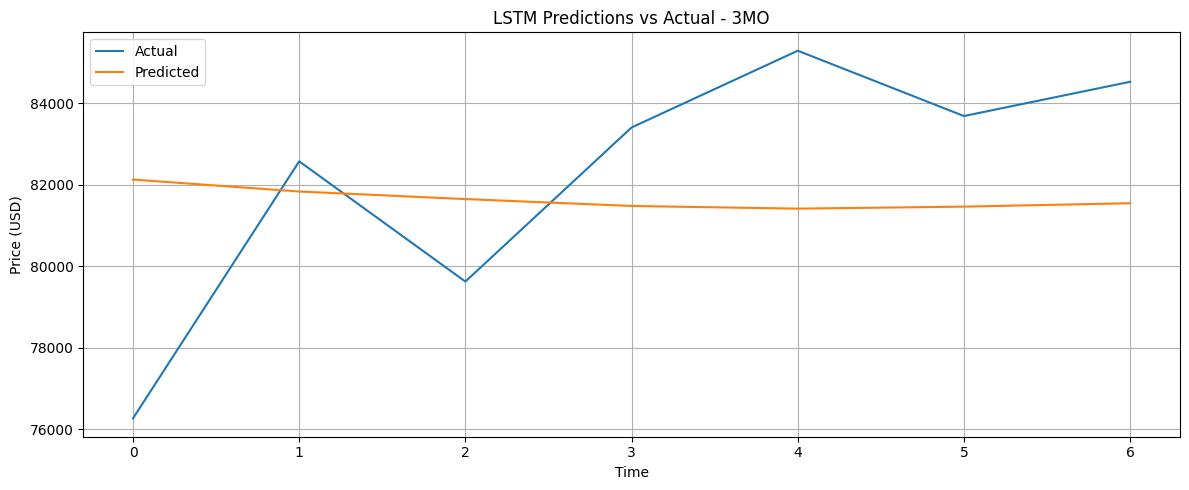

Training LSTM model for 1y data...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 391ms/step


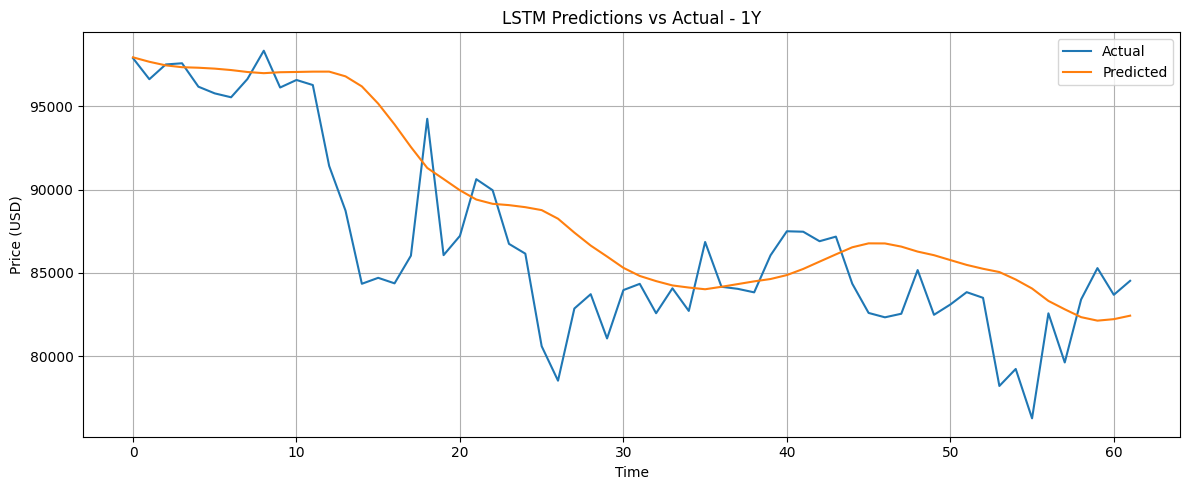

Training LSTM model for 5y data...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step


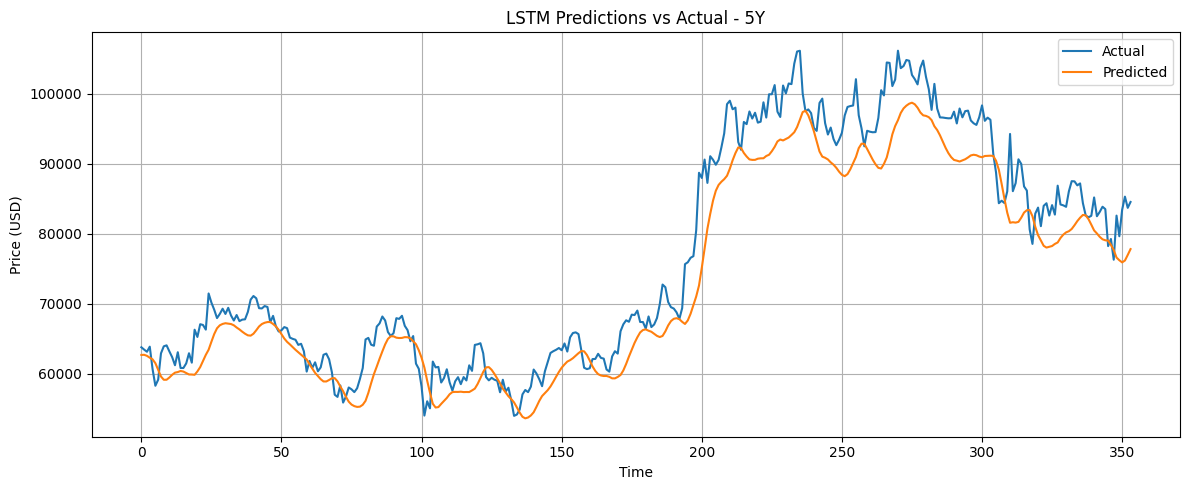

In [ ]:
# Run for all periods
periods = {
    '3mo': 'BTC_USD_3mo.csv',
    '1y': 'BTC_USD_1y.csv',
    '5y': 'BTC_USD_5y.csv'
}

for period, file in periods.items():
    print(f"Training LSTM model for {period} data...")
    train_lstm_model(file, period.upper())

## ARIMA

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Define datasets
datasets = {
    '3 Months': 'BTC_USD_3mo.csv',
    '1 Year': 'BTC_USD_1y.csv',
    '5 Years': 'BTC_USD_5y.csv'
}



⏳ Processing: 3 Months


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keywo

✅ RMSE for 3 Months: 5147.43


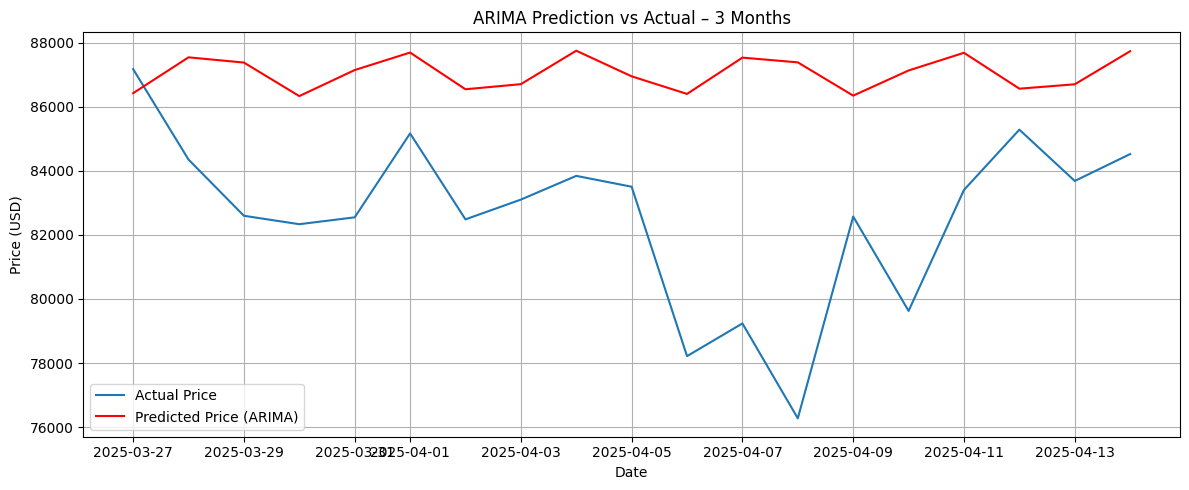


⏳ Processing: 1 Year


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

✅ RMSE for 1 Year: 17264.03


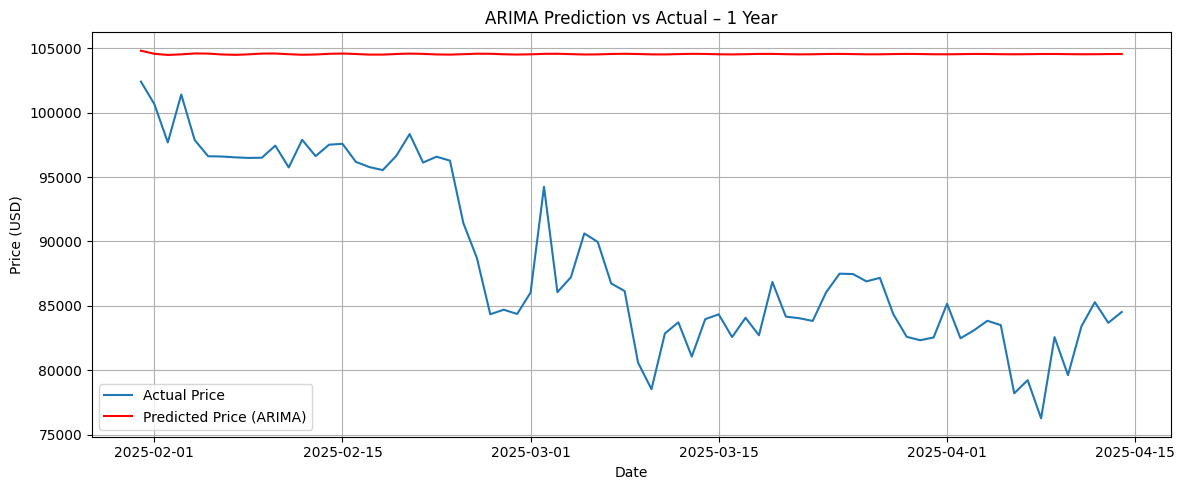


⏳ Processing: 5 Years


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


✅ RMSE for 5 Years: 20403.85


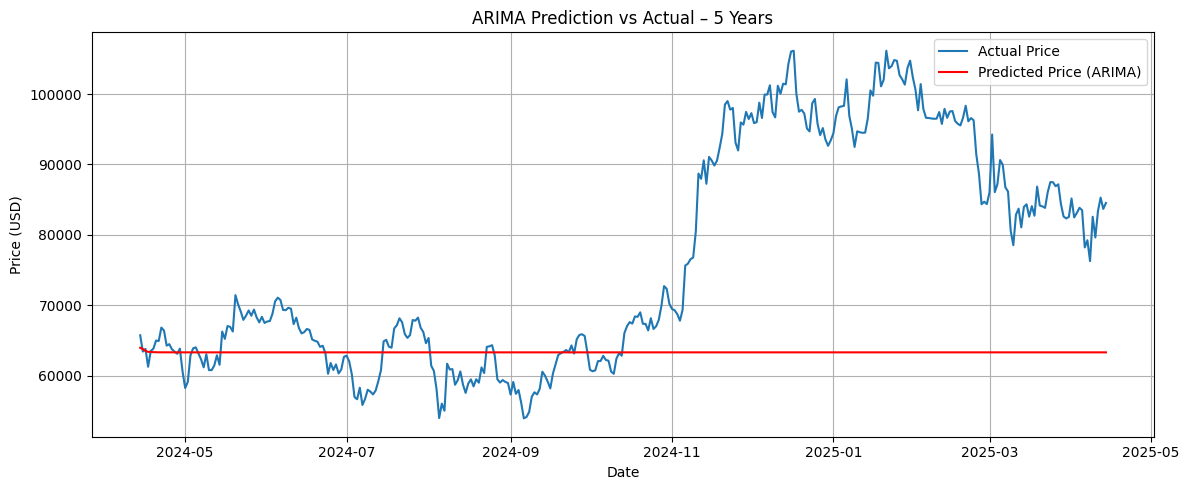

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

# Define datasets
datasets = {
    '3 Months': 'BTC_USD_3mo.csv',
    '1 Year': 'BTC_USD_1y.csv',
    '5 Years': 'BTC_USD_5y.csv'
}

for label, file in datasets.items():
    print(f"\n⏳ Processing: {label}")

    # Load dataset
    df = pd.read_csv(file, index_col=0, parse_dates=True)
    df = df[['Close']].copy()
    df = df.sort_index()

    # Train-test split (80/20)
    split_idx = int(len(df) * 0.8)
    train = df['Close'][:split_idx]
    test = df['Close'][split_idx:]

    # Fit ARIMA on training set
    model = ARIMA(train, order=(5, 1, 2))
    model_fit = model.fit()

    # Predict on the test set
    predictions = model_fit.predict(start=test.index[0], end=test.index[-1], typ='levels')

    # Align lengths
    min_len = min(len(test), len(predictions))
    test = test[:min_len]
    predictions = predictions[:min_len]

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(test, predictions))
    print(f"✅ RMSE for {label}: {rmse:.2f}")

    # Plot actual vs predicted
    plt.figure(figsize=(12, 5))
    plt.plot(test.index, test.values, label='Actual Price')
    plt.plot(predictions.index, predictions.values, label='Predicted Price (ARIMA)', color='red')
    plt.title(f'ARIMA Prediction vs Actual – {label}')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


## XGBOOST

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
# Define datasets
datasets = {
    '3 Months': 'BTC_USD_3mo.csv',
    '1 Year': 'BTC_USD_1y.csv',
    '5 Years': 'BTC_USD_5y.csv'
}


⏳ Processing: 3 Months
RMSE for 3 Months: 2636.67


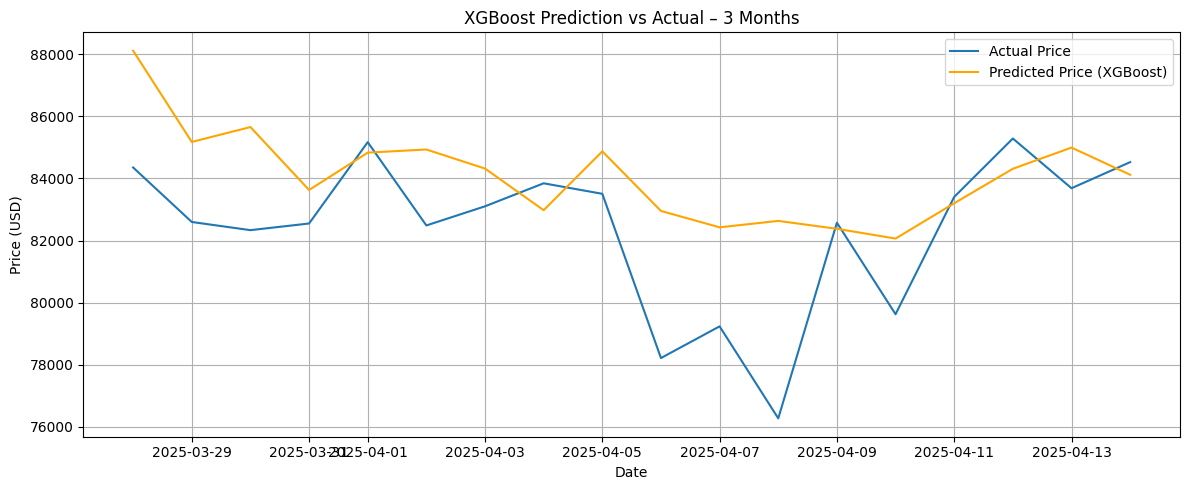


⏳ Processing: 1 Year
RMSE for 1 Year: 4471.58


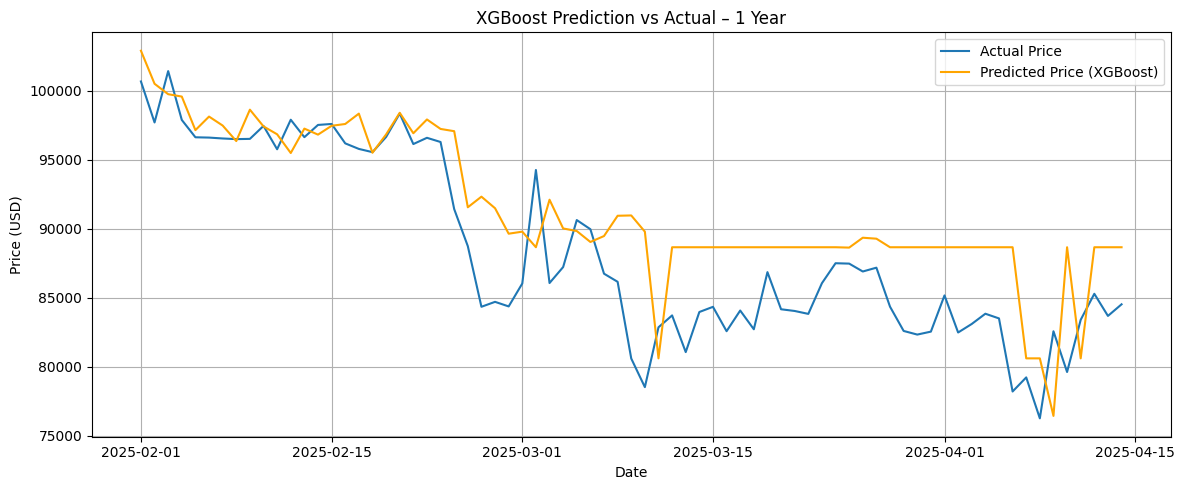


⏳ Processing: 5 Years
RMSE for 5 Years: 18488.57


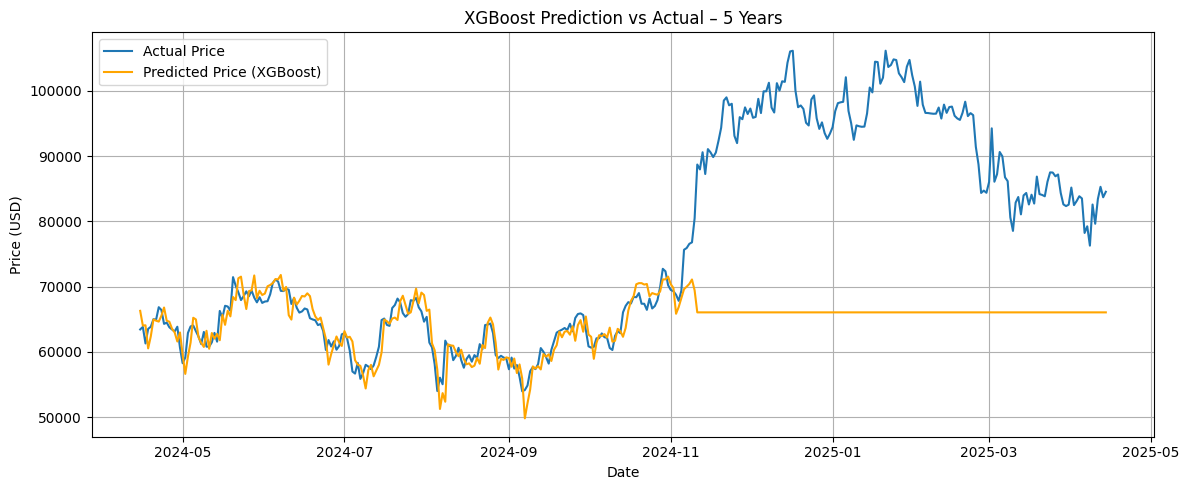

In [ ]:
# Loop through each dataset
for label, file in datasets.items():
    print(f"\n⏳ Processing: {label}")

    # Load dataset
    df = pd.read_csv(file, index_col=0, parse_dates=True)
    df = df[['Close']].copy()
    df = df.sort_index()

    # Create lag features
    for i in range(1, 6):  # lag_1 to lag_5
        df[f'lag_{i}'] = df['Close'].shift(i)

    # Drop missing rows due to lagging
    df.dropna(inplace=True)

    # Features and target
    X = df.drop(columns='Close')
    y = df['Close']

    # Train-test split (80/20)
    split_idx = int(len(X) * 0.8)
    X_train, X_test = X[:split_idx], X[split_idx:]
    y_train, y_test = y[:split_idx], y[split_idx:]

    # Train the XGBoost model
    model = XGBRegressor(n_estimators=100, learning_rate=0.1)
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Ensure matching lengths
    min_len = min(len(y_test), len(y_pred))
    y_test = y_test[:min_len]
    y_pred = y_pred[:min_len]

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"RMSE for {label}: {rmse:.2f}")

    # Plot predicted vs actual
    plt.figure(figsize=(12, 5))
    plt.plot(y_test.index, y_test.values, label='Actual Price')
    plt.plot(y_test.index, y_pred, label='Predicted Price (XGBoost)', color='orange')
    plt.title(f'XGBoost Prediction vs Actual – {label}')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Timeframes
timeframes = {
    '3M': 'BTC_USD_3mo.csv',
    '1Y': 'BTC_USD_1y.csv',
    '5Y': 'BTC_USD_5y.csv'
}

def create_dataset(series, look_back=60):
    X, y = [], []
    for i in range(len(series) - look_back):
        X.append(series[i:i + look_back])
        y.append(series[i + look_back])
    return np.array(X), np.array(y)

results = {}

for label, file in timeframes.items():
    df = pd.read_csv(file, index_col=0, parse_dates=True)[['Close']].dropna()

    # Normalize data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(df)

    # Create dataset
    look_back = 60
    X, y = create_dataset(scaled_data, look_back)
    X = X.reshape((X.shape[0], X.shape[1], 1))

    split = int(len(X) * 0.8)
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y[:split], y[split:]

    # Build LSTM model
    lstm_model = Sequential([
        LSTM(50, input_shape=(look_back, 1)),
        Dense(1)
    ])
    lstm_model.compile(optimizer='adam', loss='mse')
    lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

    # Get LSTM output to use in XGBoost
    lstm_pred_train = lstm_model.predict(X_train)
    lstm_pred_test = lstm_model.predict(X_test)

    xgb_model = XGBRegressor(n_estimators=100)
    xgb_model.fit(lstm_pred_train, y_train)

    xgb_preds = xgb_model.predict(lstm_pred_test)

    # Inverse scale
    actual = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
    predicted = scaler.inverse_transform(xgb_preds.reshape(-1, 1)).flatten()

    rmse = np.sqrt(mean_squared_error(actual, predicted))
    accuracy = 100 - (np.mean(np.abs(actual - predicted) / actual) * 100)

    results[label] = {
        'RMSE': round(rmse, 2),
        'Accuracy (%)': round(accuracy, 2)
    }

# Show final results
result_df = pd.DataFrame(results).T
print(result_df)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/8 ━━━━━━━━━━━━━━━━━━━━ 1s 167ms/step

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
        RMSE  Accuracy (%)
3M   4180.76         95.41
1Y   8530.18         91.15
5Y  17529.26         86.23


# Accuracy

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define dataset paths
datasets = {
    '3 Months': 'BTC_USD_3mo.csv',
    '1 Year': 'BTC_USD_1y.csv',
    '5 Years': 'BTC_USD_5y.csv'
}

# Evaluation function
def evaluate_model(y_true, y_pred, model_name, label):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    accuracy = r2 * 100
    print(f"\n📊 {model_name} - {label}")
    print(f"✅ RMSE: {rmse:.2f}")
    print(f"✅ R² Score: {r2:.4f}")
    print(f"✅ Accuracy: {accuracy:.2f}%")

# Loop for both ARIMA and XGBoost
for label, file in datasets.items():
    print(f"\n==================== {label} ====================")

    # Load and prepare data
    df = pd.read_csv(file, index_col=0, parse_dates=True)
    df = df[['Close']].copy()
    df = df.sort_index()

    # ===== ARIMA Model =====
    split_idx = int(len(df) * 0.8)
    train_arima = df['Close'][:split_idx]
    test_arima = df['Close'][split_idx:]

    model_arima = ARIMA(train_arima, order=(5, 1, 2))
    model_fit_arima = model_arima.fit()

    preds_arima = model_fit_arima.predict(start=test_arima.index[0], end=test_arima.index[-1], typ='levels')

    # Align lengths
    min_len = min(len(test_arima), len(preds_arima))
    evaluate_model(test_arima[:min_len], preds_arima[:min_len], "ARIMA", label)

    # ===== XGBoost Model =====
    df_xgb = df.copy()
    for i in range(1, 6):  # Create lag_1 to lag_5
        df_xgb[f'lag_{i}'] = df_xgb['Close'].shift(i)
    df_xgb.dropna(inplace=True)

    X = df_xgb.drop(columns='Close')
    y = df_xgb['Close']

    split_idx = int(len(X) * 0.8)
    X_train, X_test = X[:split_idx], X[split_idx:]
    y_train, y_test = y[:split_idx], y[split_idx:]

    model_xgb = XGBRegressor(n_estimators=100, learning_rate=0.1)
    model_xgb.fit(X_train, y_train)
    y_pred_xgb = model_xgb.predict(X_test)

    min_len = min(len(y_test), len(y_pred_xgb))
    evaluate_model(y_test[:min_len], y_pred_xgb[:min_len], "XGBoost", label)



==================== 3 Months ====================


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keywo


📊 ARIMA - 3 Months
✅ RMSE: 5147.43
✅ R² Score: -3.0111
✅ Accuracy: -301.11%

📊 XGBoost - 3 Months
✅ RMSE: 2636.67
✅ R² Score: -0.2071
✅ Accuracy: -20.71%

==================== 1 Year ====================


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)



📊 ARIMA - 1 Year
✅ RMSE: 17264.03
✅ R² Score: -5.6207
✅ Accuracy: -562.07%

📊 XGBoost - 1 Year
✅ RMSE: 4471.58
✅ R² Score: 0.5350
✅ Accuracy: 53.50%

==================== 5 Years ====================


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)



📊 ARIMA - 5 Years
✅ RMSE: 20403.85
✅ R² Score: -0.6848
✅ Accuracy: -68.48%

📊 XGBoost - 5 Years
✅ RMSE: 18488.57
✅ R² Score: -0.3813
✅ Accuracy: -38.13%


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
